In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from numpy.linalg import norm

import scipy as spy

import scipy.stats as st 

import matplotlib.pyplot as plt

import pints

import smol_ODE_Pro_clus_size


In [2]:
df = pd.read_csv('2017-03-16_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())
N_max = 100



b_best = [1.93e-04]
m_best = [1.56e-03]
N = [717]
## Running of solver
tmin = 1
tmax = 145
# tmax = 1000
tspan = np.linspace(tmin, tmax, 145)

## IC 
# (set to allow for metastatic invasion)

n0 = np.zeros((N_max))
n0[0] = N[0]


b = b_best[0]
m = m_best[0]


result = odeint(smol_ODE_Pro_clus_size.ext_smol,n0,tspan,args = (b,m,N_max))

final_time = result[-1,:]

N_t = 0
for i in range(len(final_time)):
    N_t += (i+1)*final_time[i]

print('Mass', N_t)



result_interested = result[19:,:]

Mass 896.7231536242365


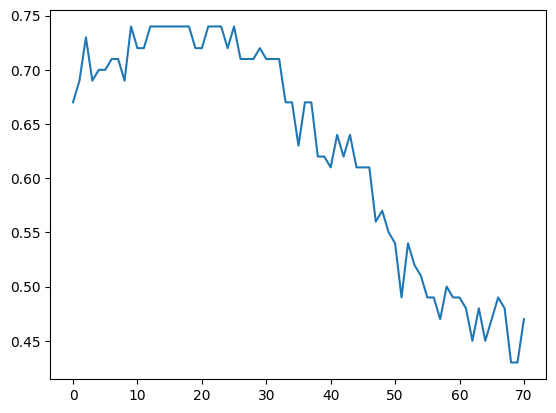

In [3]:


KS_test_array = []
for i in range(71):
    KS_test = spy.stats.kstest(result_interested[i,:], org_values[i,:])
    KS_test_array = np.append(KS_test_array, KS_test.statistic)

plt.plot(KS_test_array)